In [3]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
# Load the .mat file
'''
 data_path = f"E:\data/dataClean-ICA3-{num}-T1.mat"
 num = 25,...,35
'''
data = loadmat('E:\data/dataClean-ICA3-25-T1.mat')

In [3]:
a.shape

(60, 1200, 108, 12)

In [2]:
a=data['dataSorted']
np.reshape(a, (a.shape[0], a.shape[1]*a.shape[2]), order='F').T.shape

ValueError: cannot reshape array of size 93312000 into shape (60,129600)

In [9]:
def plot_(array, channel, trial, block,T):
    y = array[channel, :T, trial, block]
    x = range(len(y))
    plt.figure(figsize=(14, 4)) 
    plt.plot(x,y, label=f"Channel: {channel}; Trial: {trial}; Block : {block}")

    plt.xlabel('t')
    plt.ylabel('Signal')
    plt.title('Time Series Plot')
    
    # Adding grid
    plt.grid(True)
    plt.legend()
    return 

def summary(array, text=True):
    shape = array.shape
    C = shape[0] #Channels (signal), 
    T = shape[1] #time,
    Trials = shape[2] # trial,
    B = shape[3] #trialblock
    empty = np.zeros((B))
    dict = {}
    for b in range(B):
        channels = []
        for c in range(C):
            if np.all(np.isnan(array[c,:,0,b])):
               channels.append(c)
               empty[b] = len(channels)
               dict.update({f"{b}": channels})
    #print(f"Total empty channels: {np.sum(empty)*}")
    #print(f"Average empty channels: {np.sum(empty)/(b*t)}")
    if text:
        print(f"Channels: {C}, Trials: {Trials}, TrialBlocks: {B}")
        print(f"Number of active channels for each trial block: {60-empty}")
    return dict

There are two type of trials based on missing channels:

## Data exploration

In [ ]:
data1 = loadmat('E:\data/dataClean-ICA3-26-T1.mat')
summary(data1['dataSorted'])

In [4]:
summary(data['dataSorted'])

Channels: 60, Trials: 108, TrialBlocks: 12
Number of active channels for each trial block: [48. 52. 48. 48. 52. 52. 48. 52. 48. 52. 48. 52.]


{'0': [7, 9, 10, 12, 13, 15, 17, 19, 25, 26, 34, 45],
 '1': [8, 10, 12, 20, 21, 28, 29, 55],
 '2': [7, 9, 10, 12, 13, 15, 17, 19, 25, 26, 34, 45],
 '3': [7, 9, 10, 12, 13, 15, 17, 19, 25, 26, 34, 45],
 '4': [8, 10, 12, 20, 21, 28, 29, 55],
 '5': [8, 10, 12, 20, 21, 28, 29, 55],
 '6': [7, 9, 10, 12, 13, 15, 17, 19, 25, 26, 34, 45],
 '7': [8, 10, 12, 20, 21, 28, 29, 55],
 '8': [7, 9, 10, 12, 13, 15, 17, 19, 25, 26, 34, 45],
 '9': [8, 10, 12, 20, 21, 28, 29, 55],
 '10': [7, 9, 10, 12, 13, 15, 17, 19, 25, 26, 34, 45],
 '11': [8, 10, 12, 20, 21, 28, 29, 55]}

In [51]:
data['listD']

array([[ 1,  2,  3,  4,  5,  6,  7, 12, 15, 17, 19, 23, 24, 25, 28, 31,
        32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 57, 58, 59, 60]], dtype=uint8)

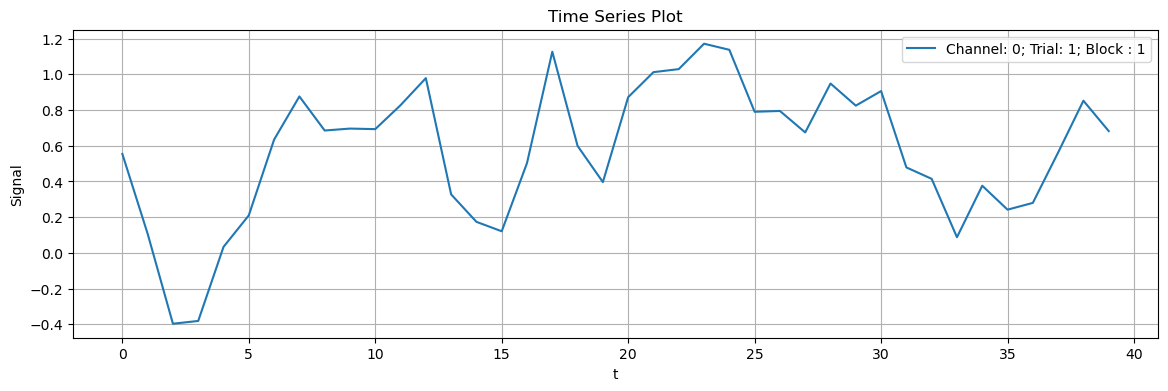

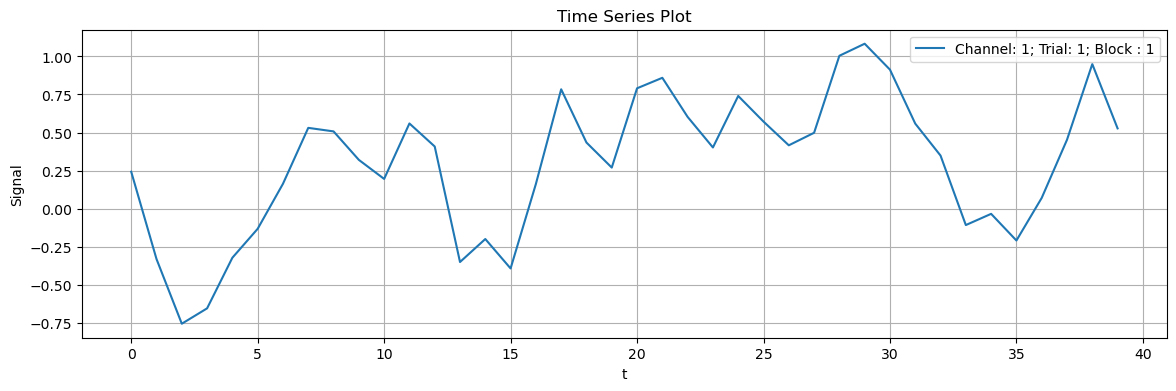

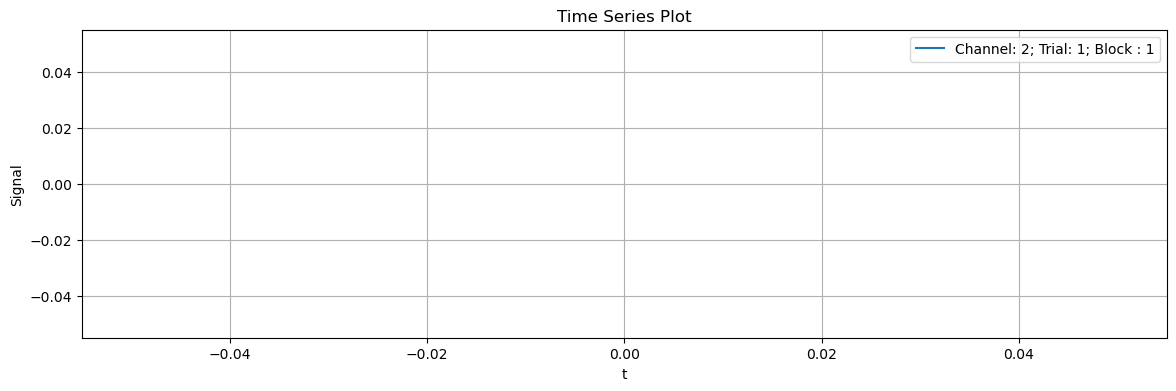

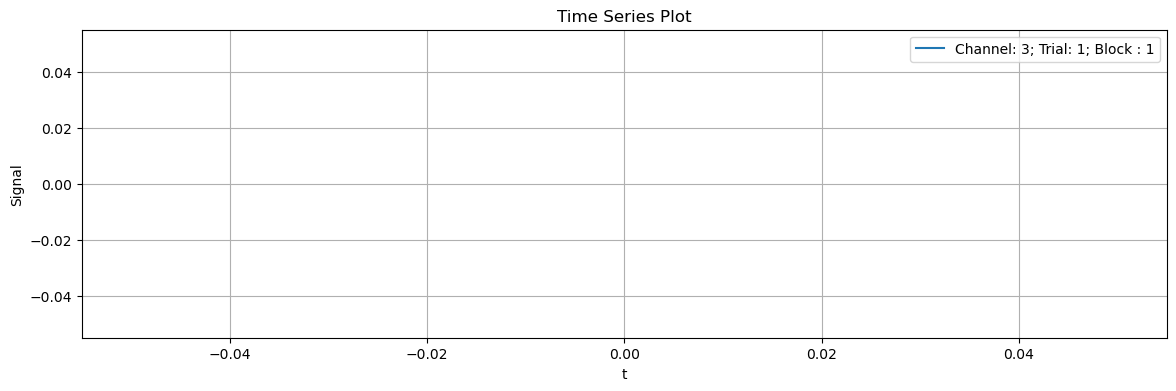

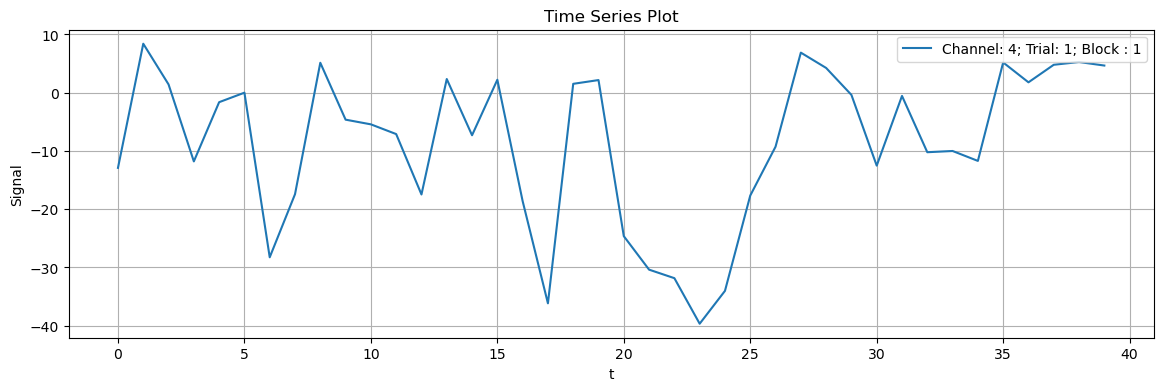

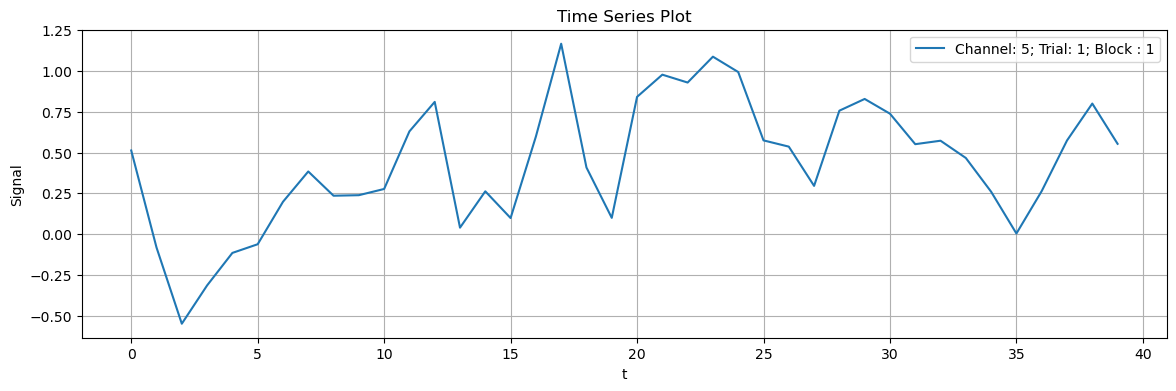

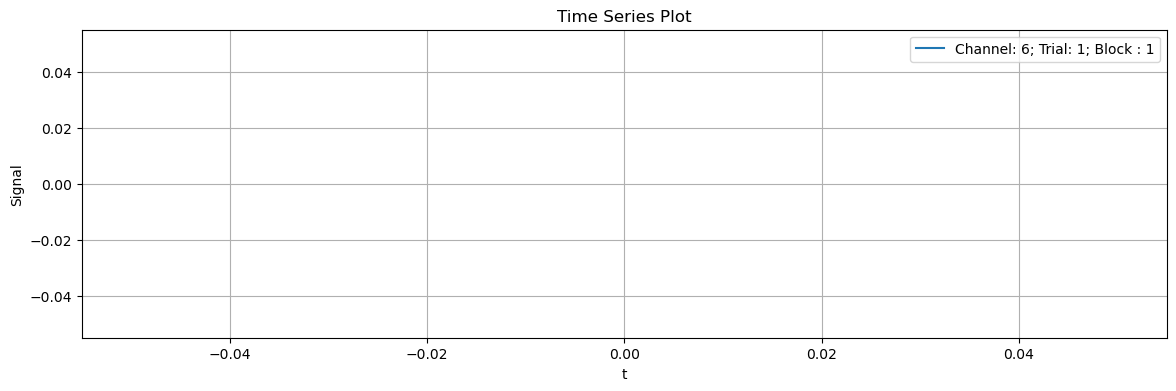

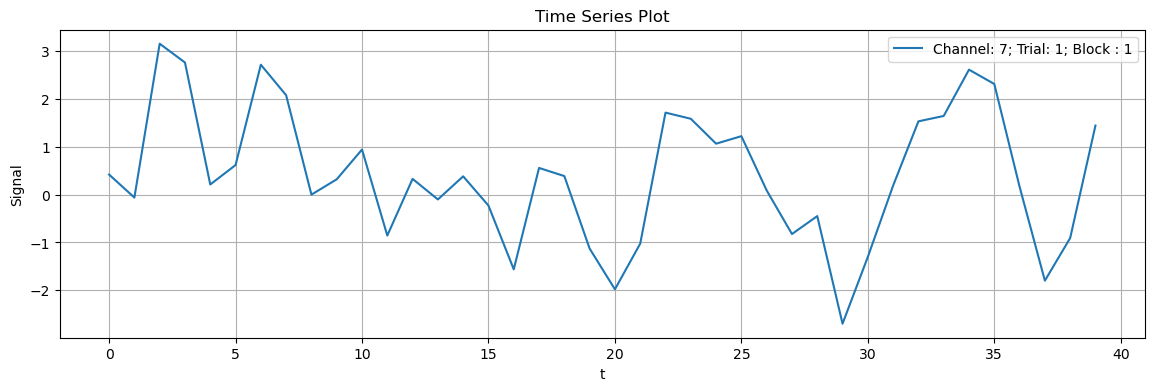

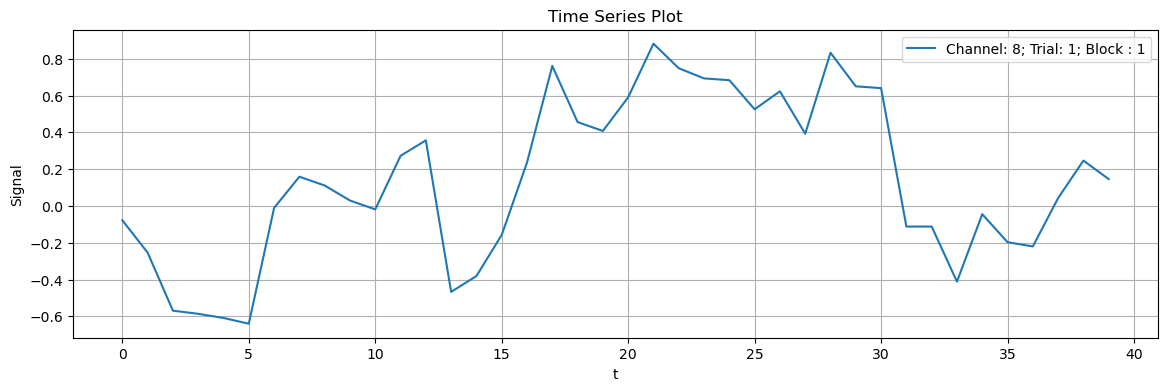

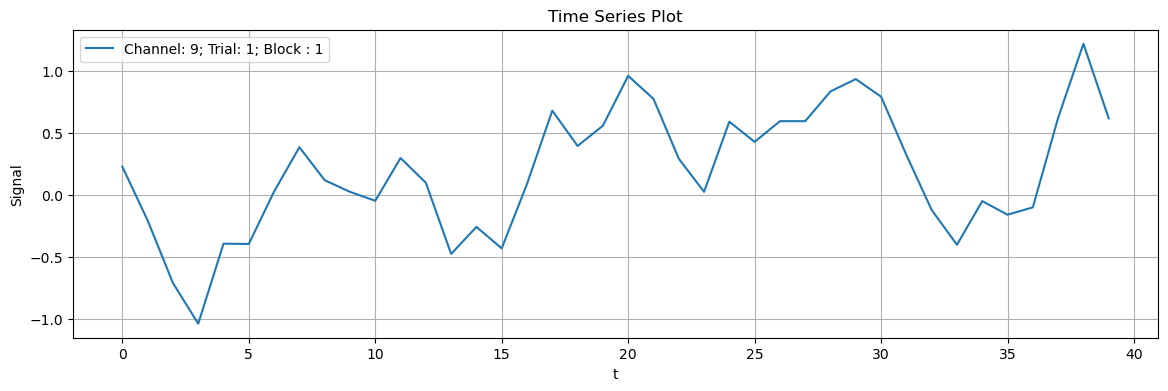

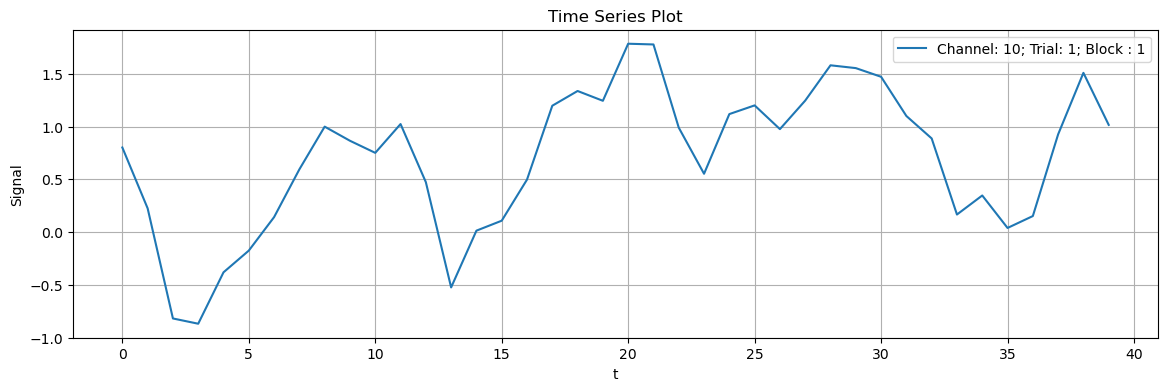

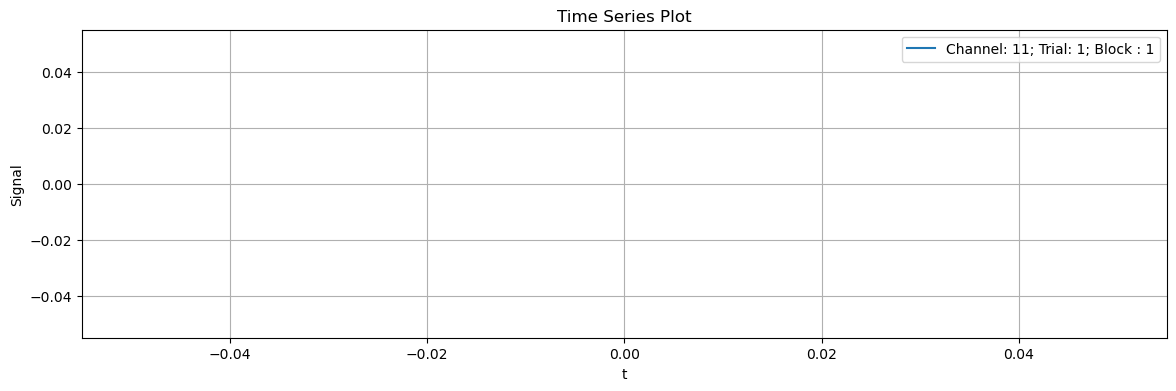

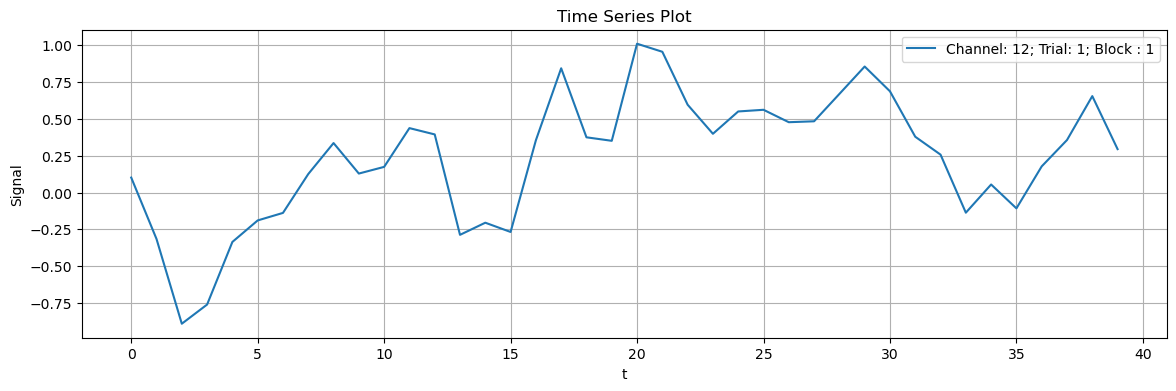

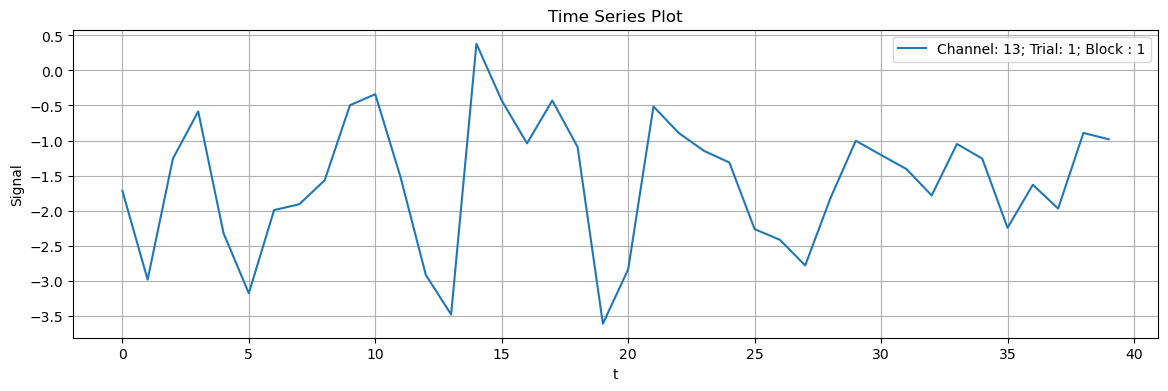

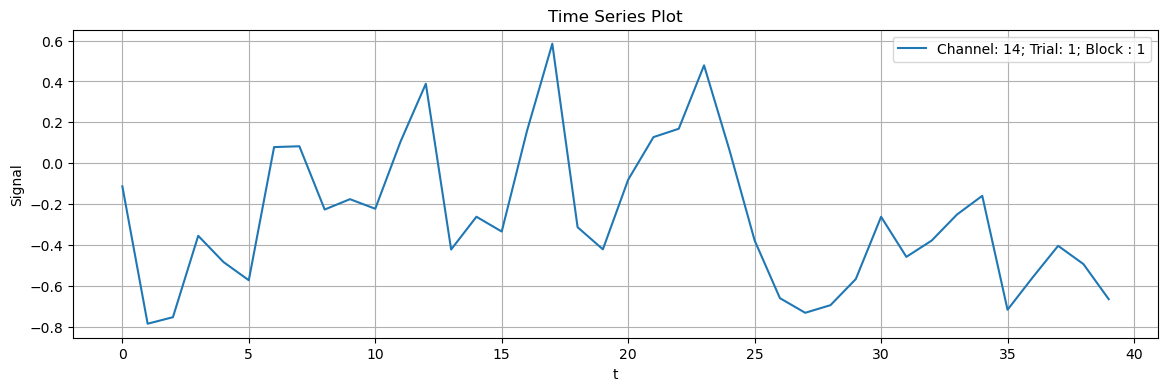

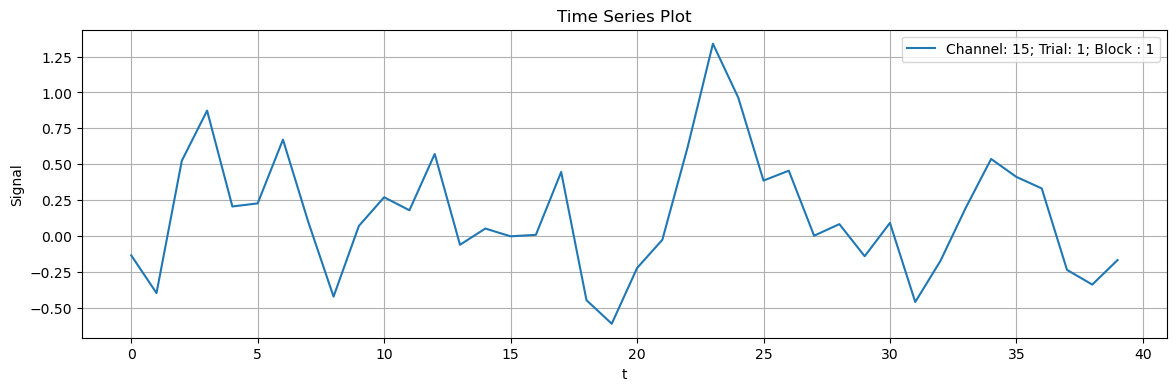

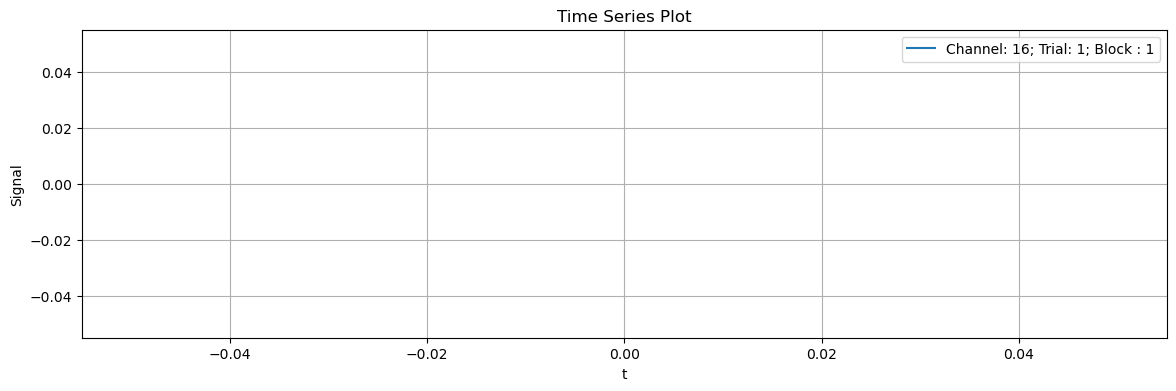

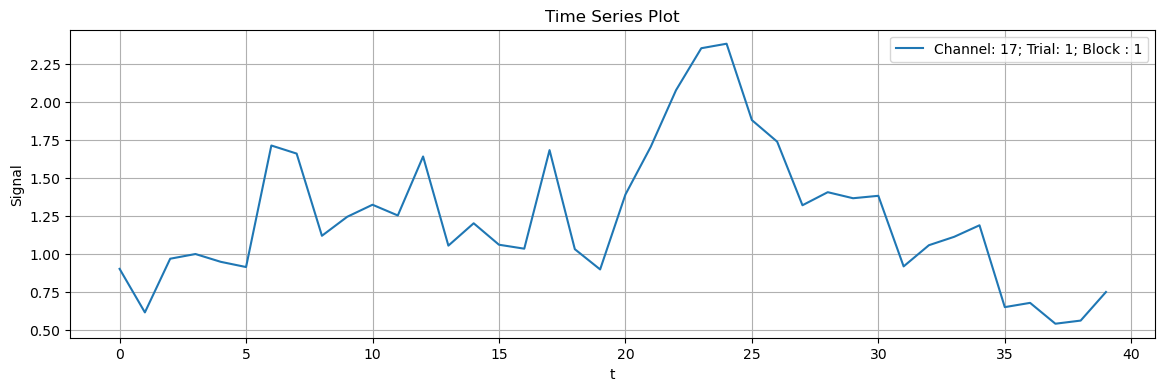

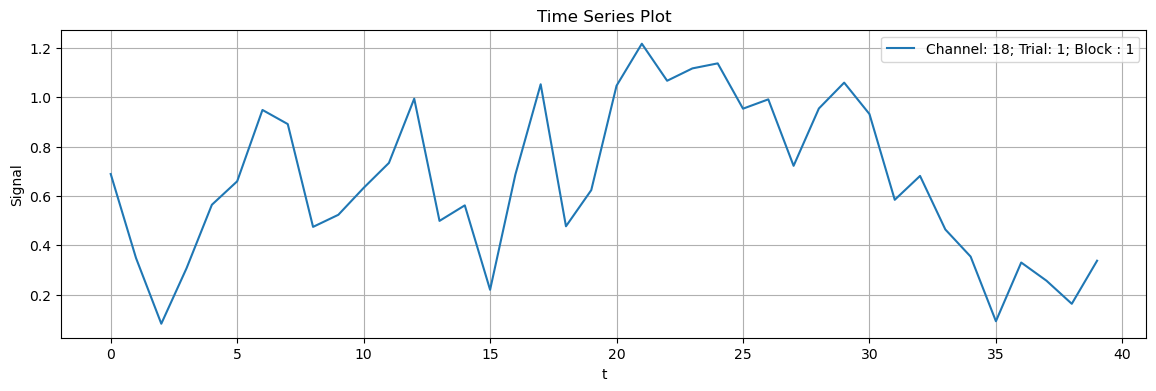

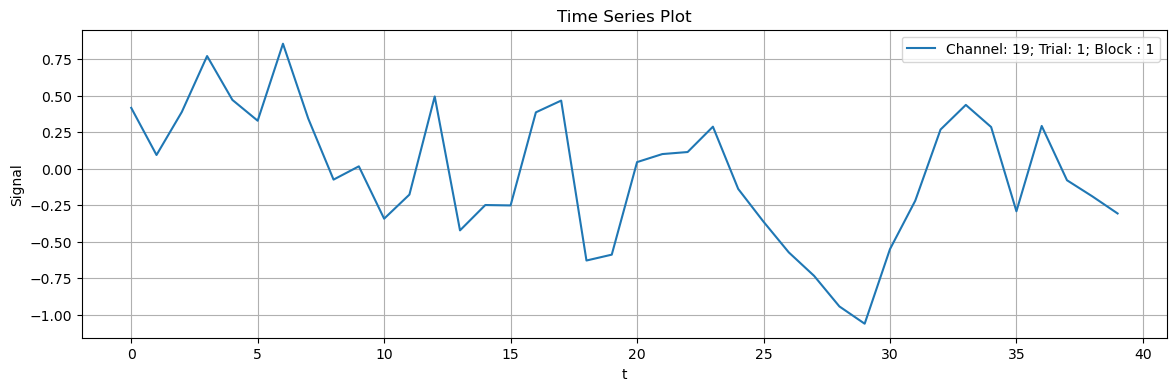

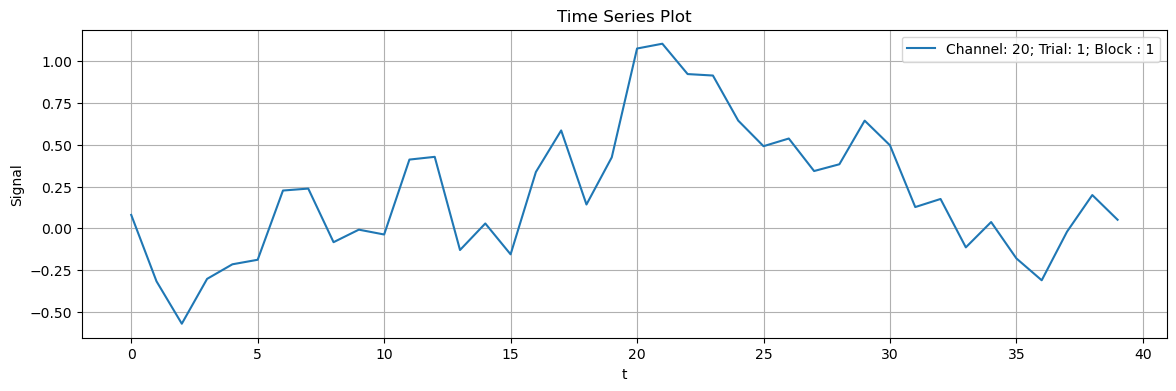

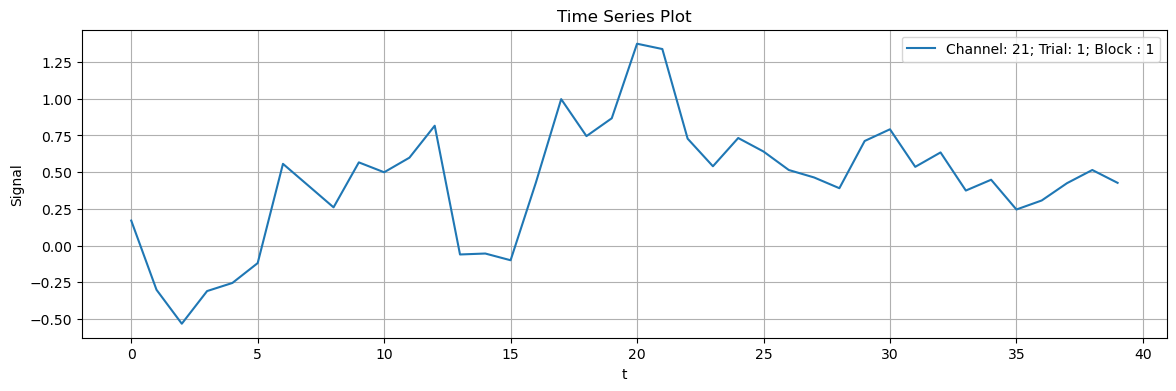

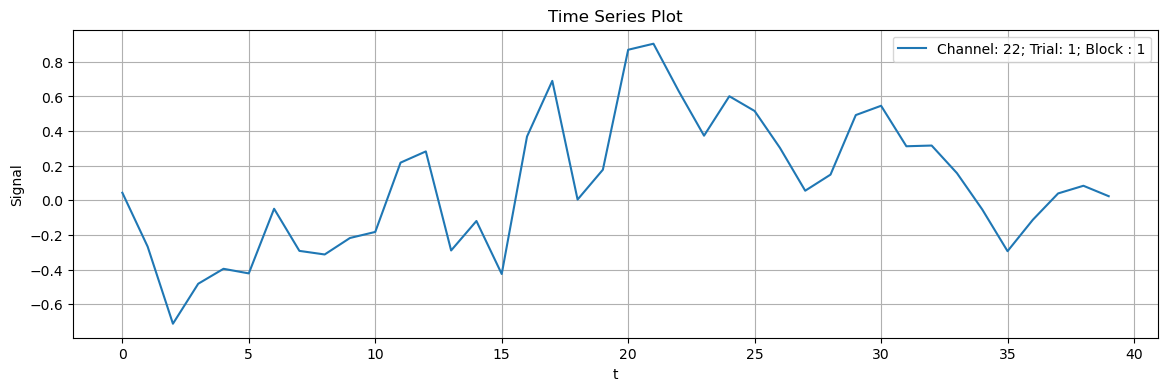

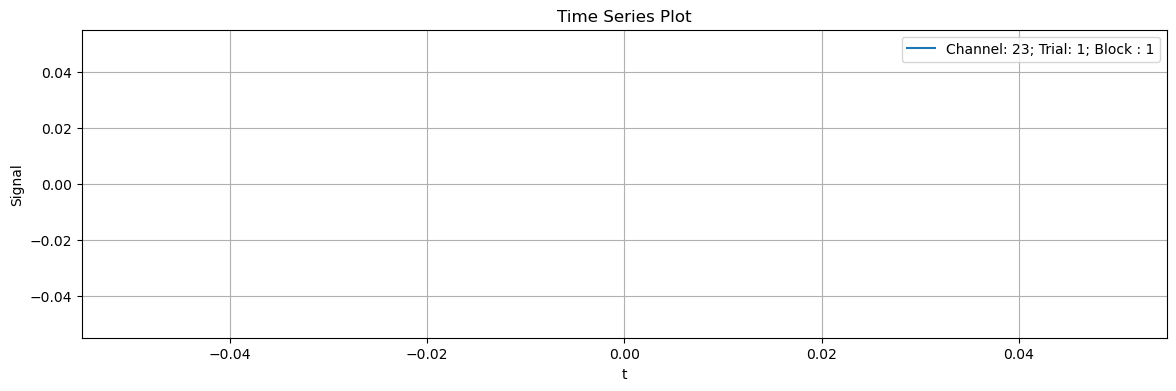

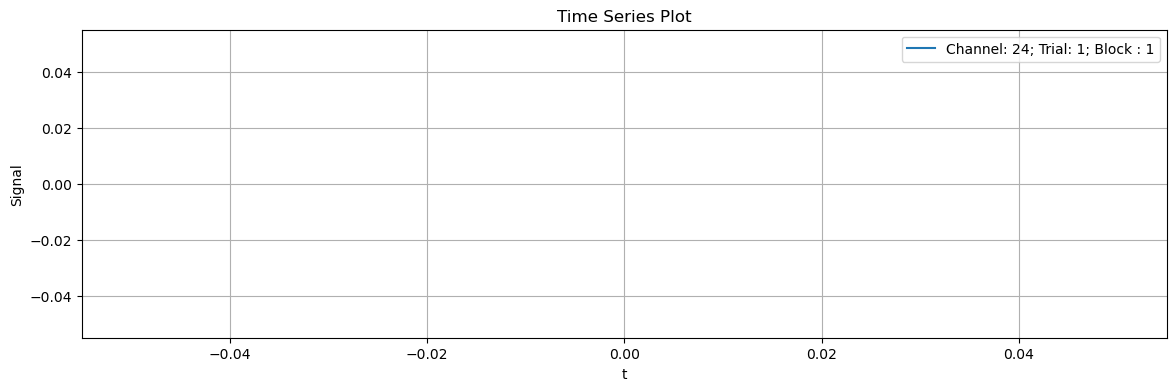

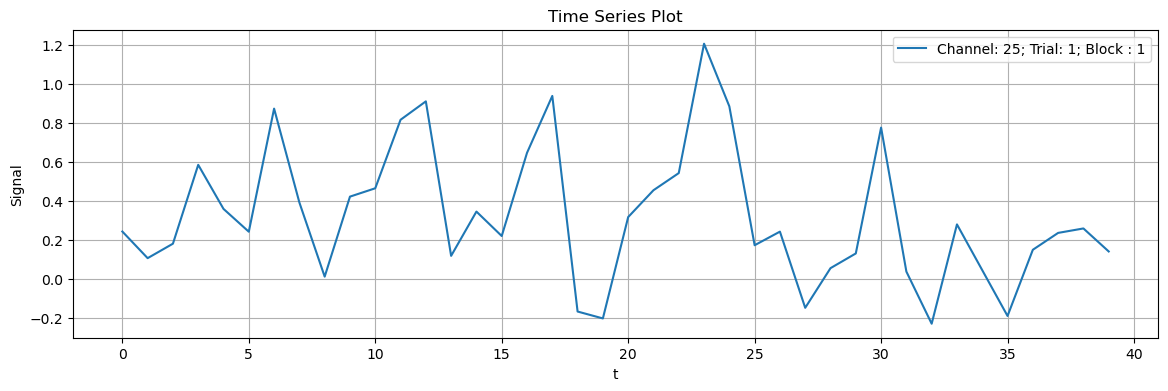

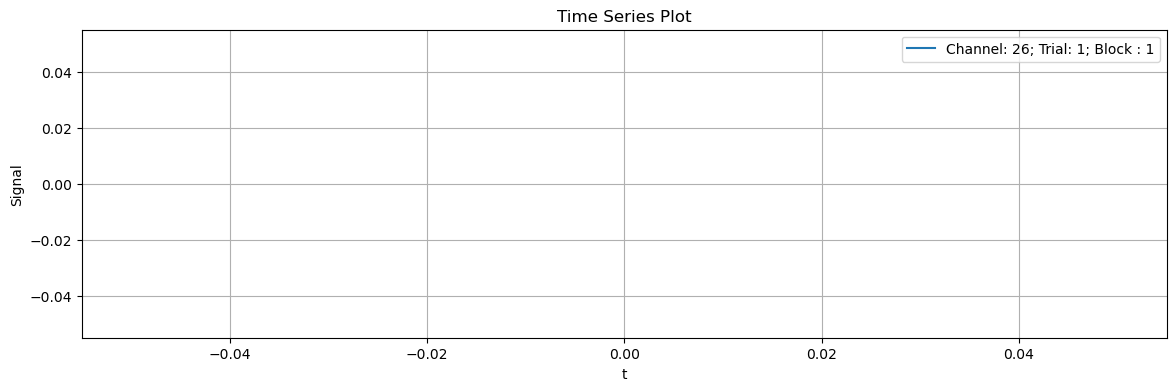

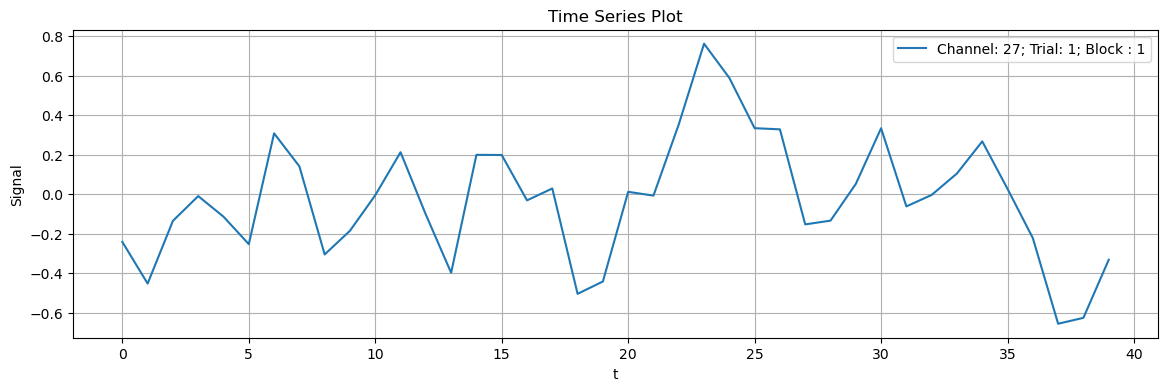

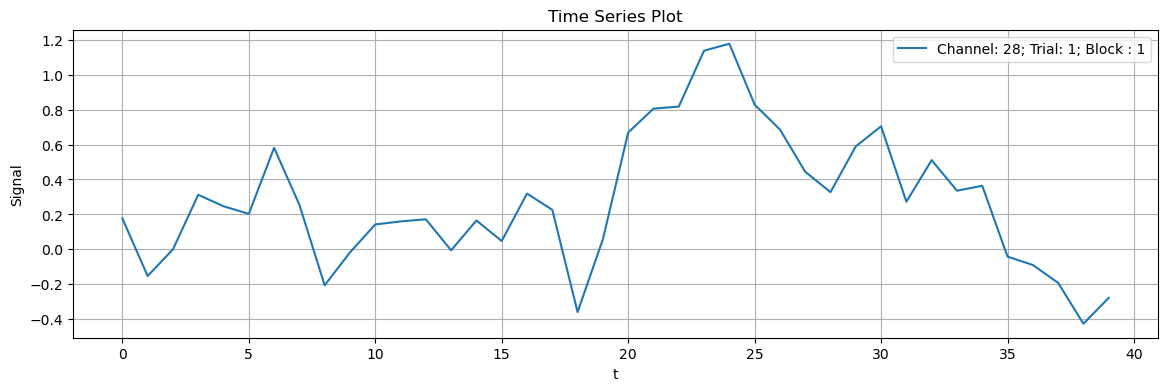

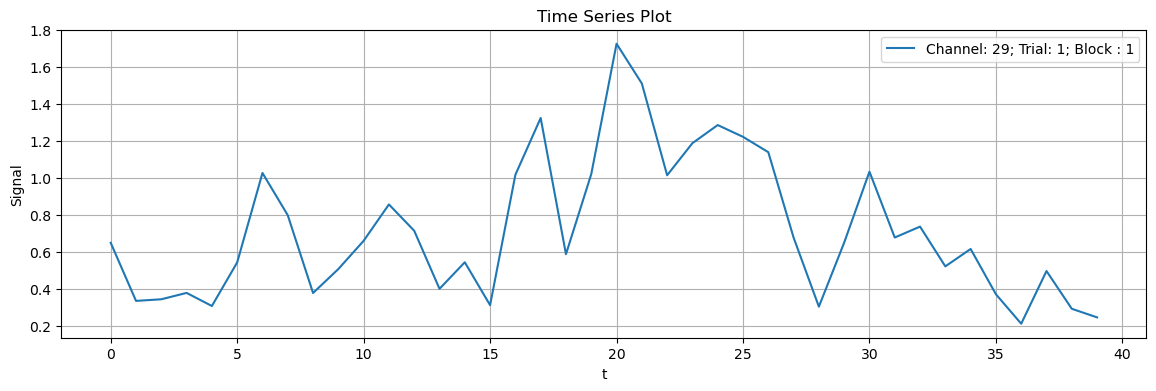

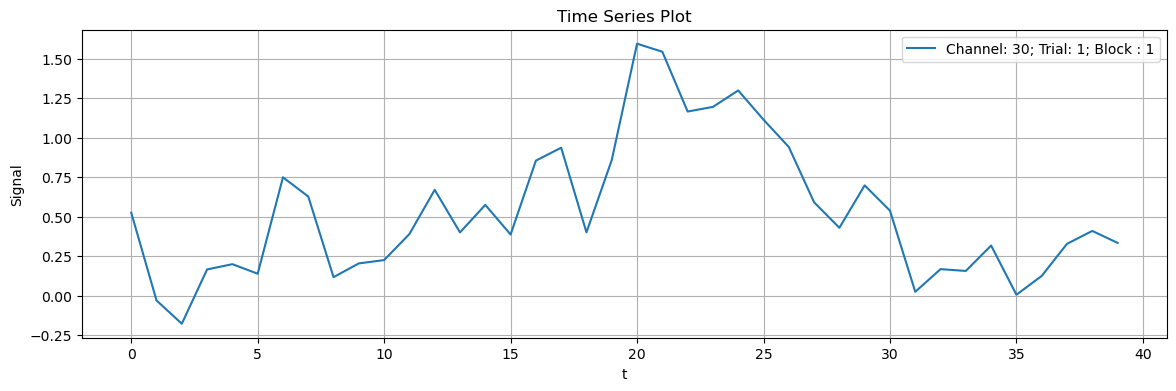

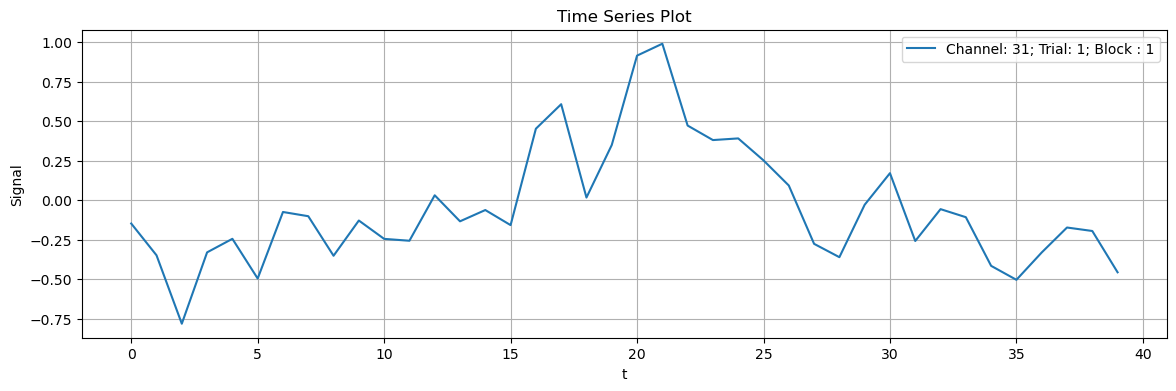

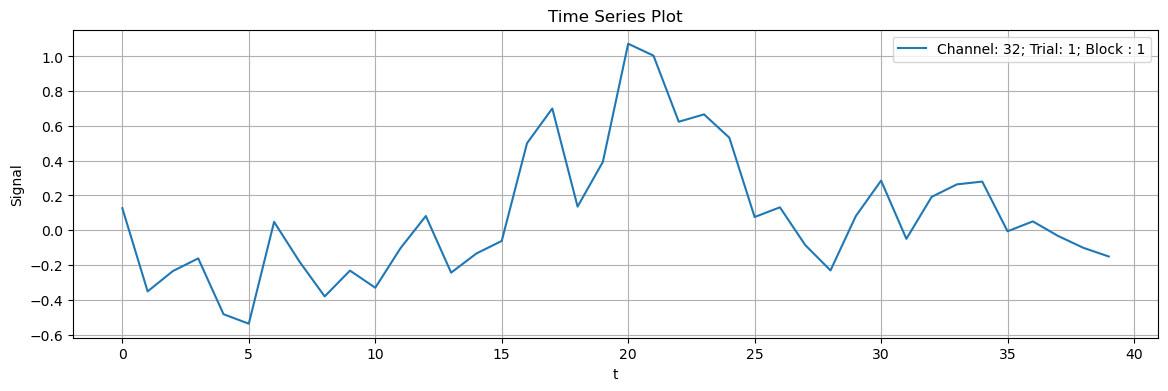

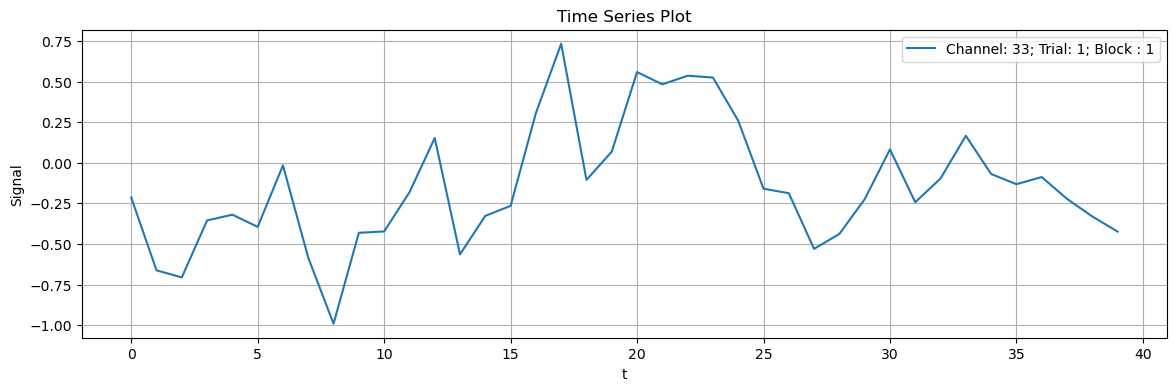

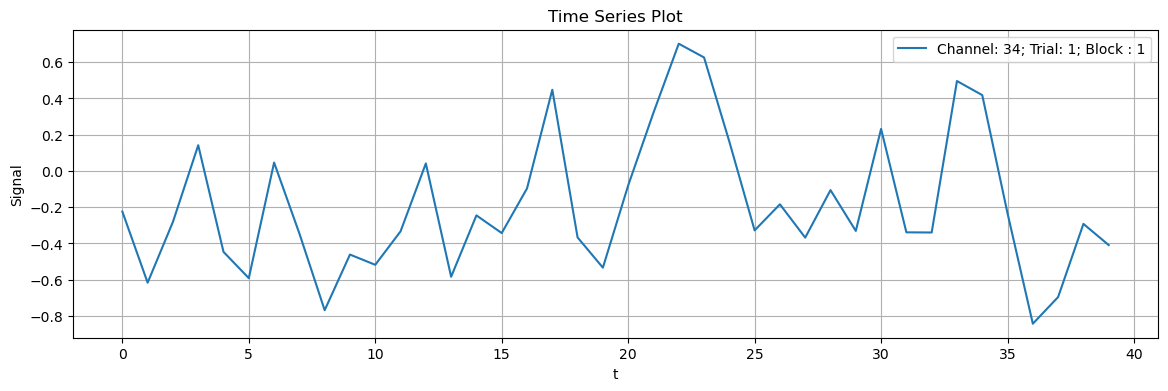

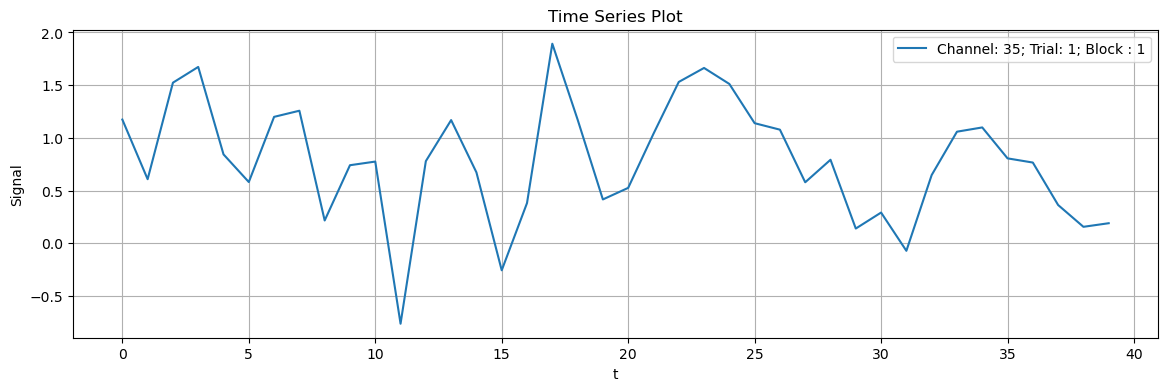

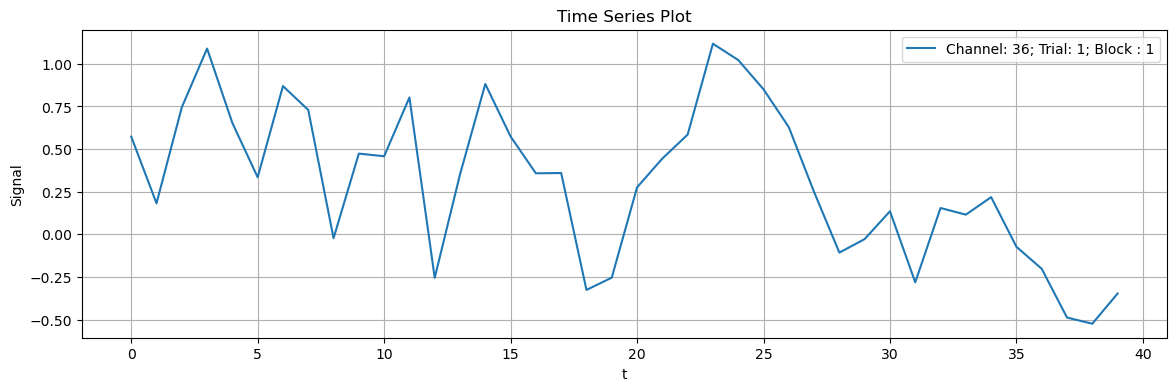

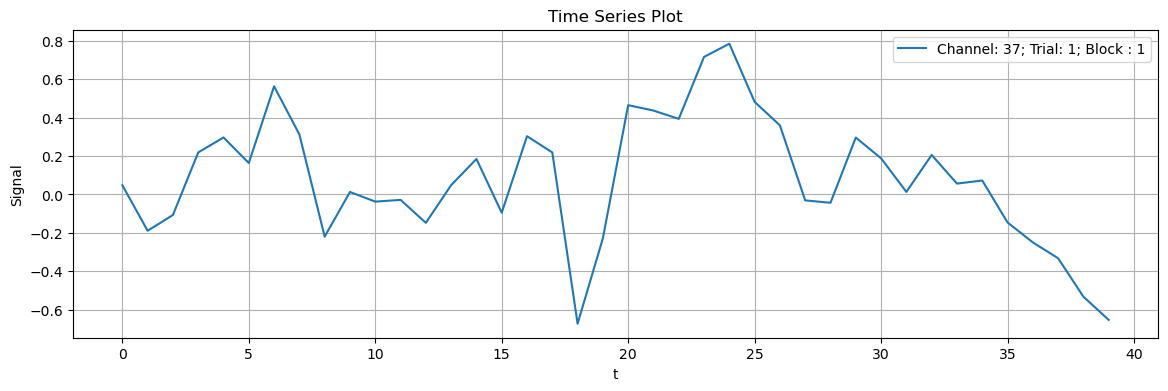

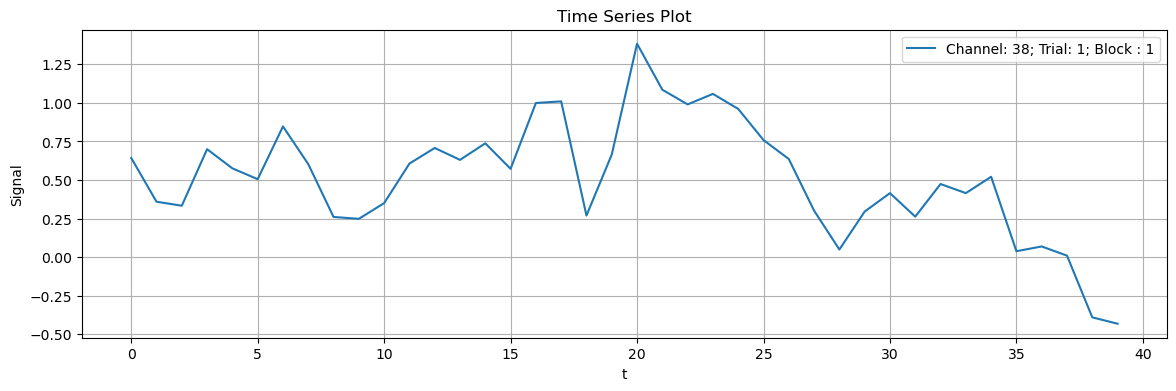

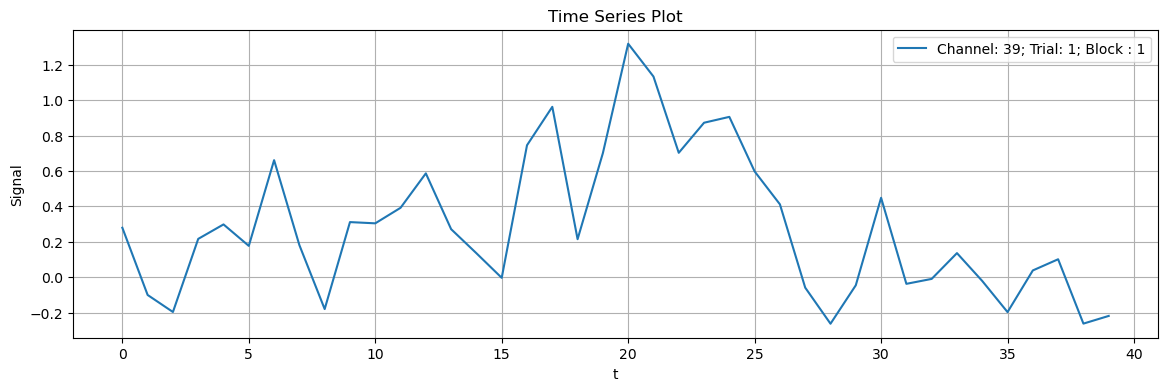

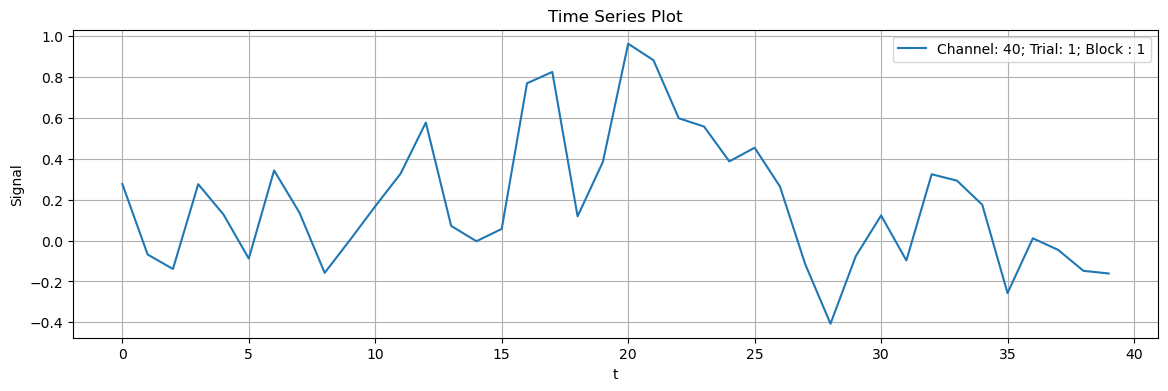

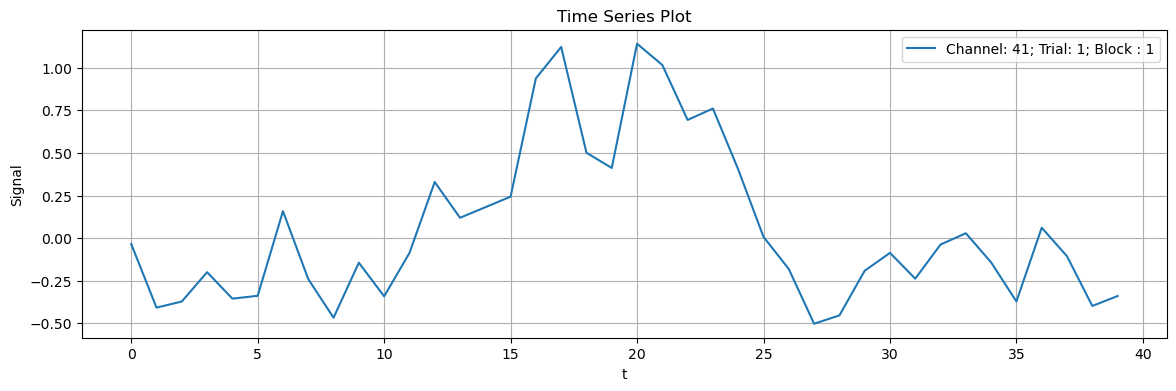

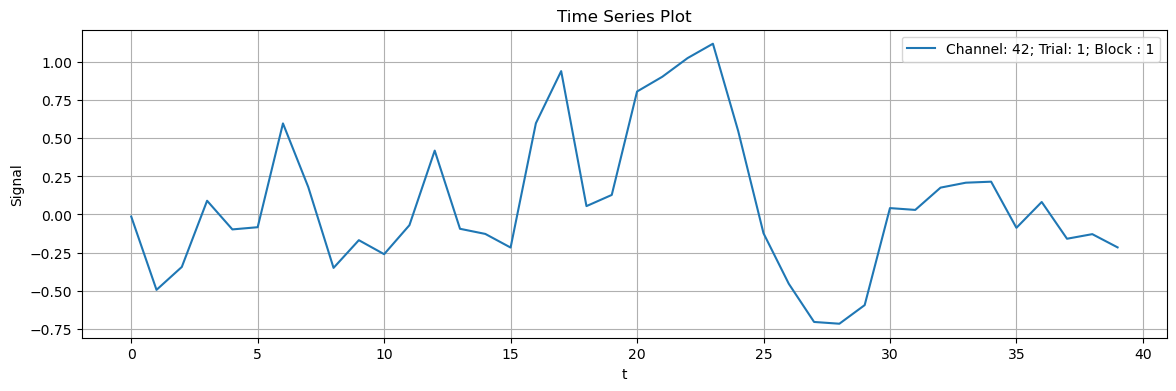

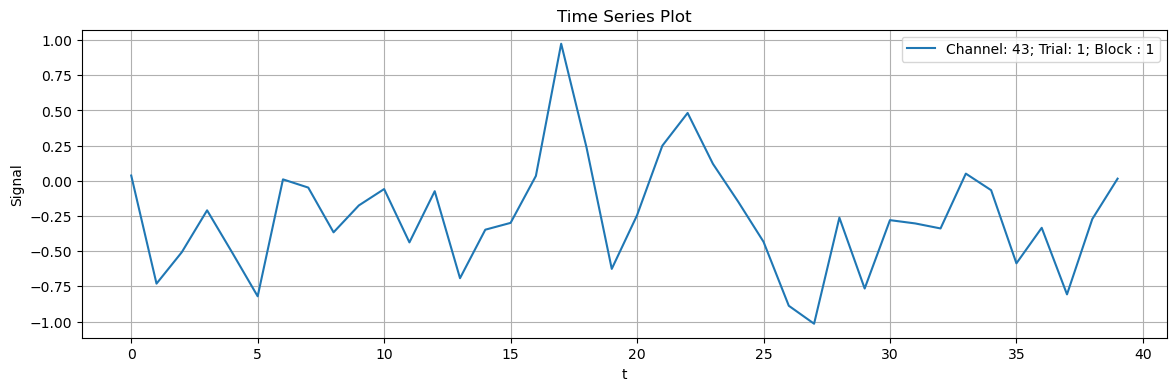

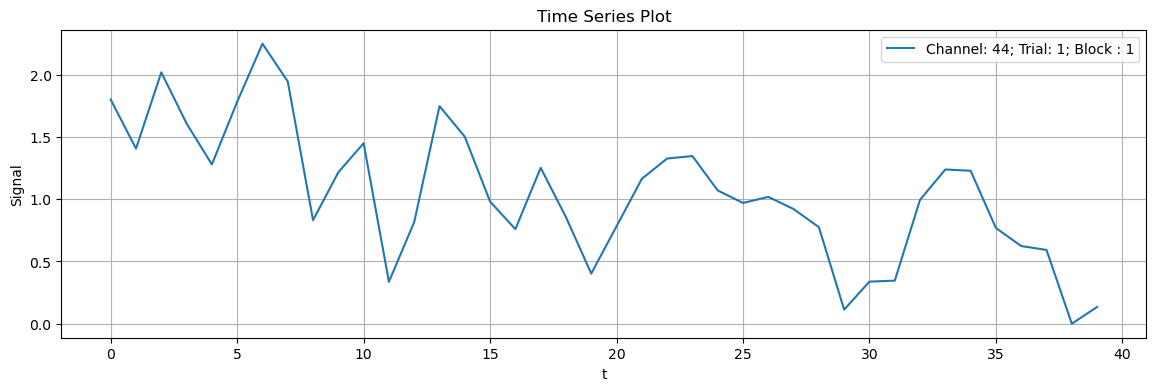

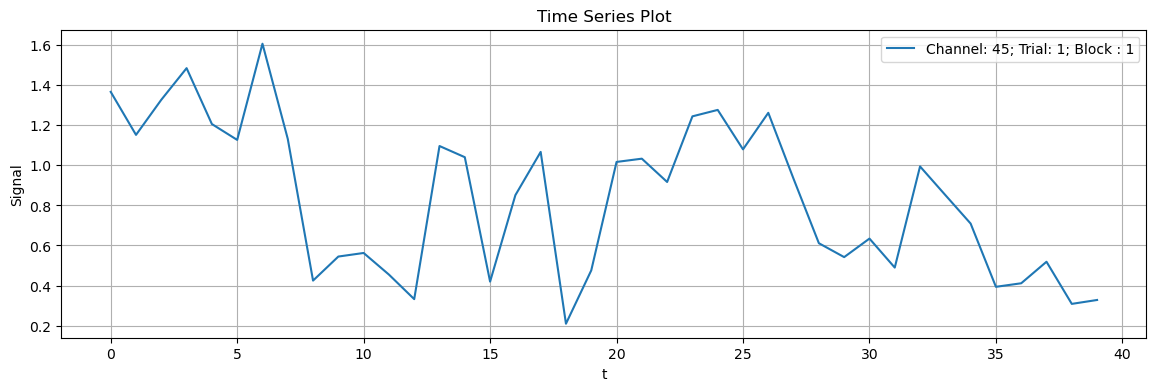

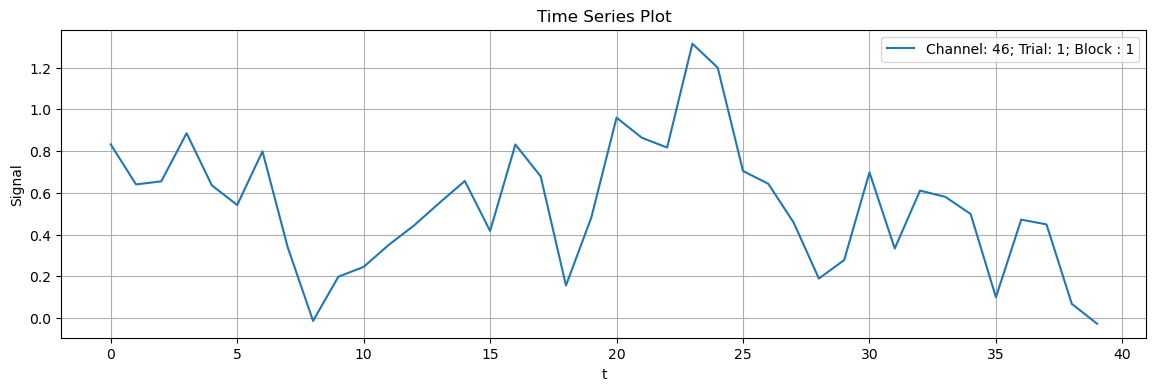

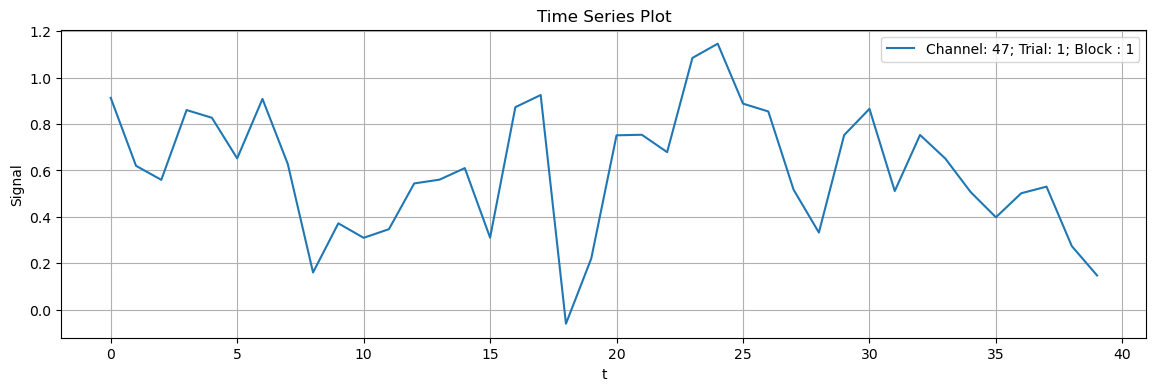

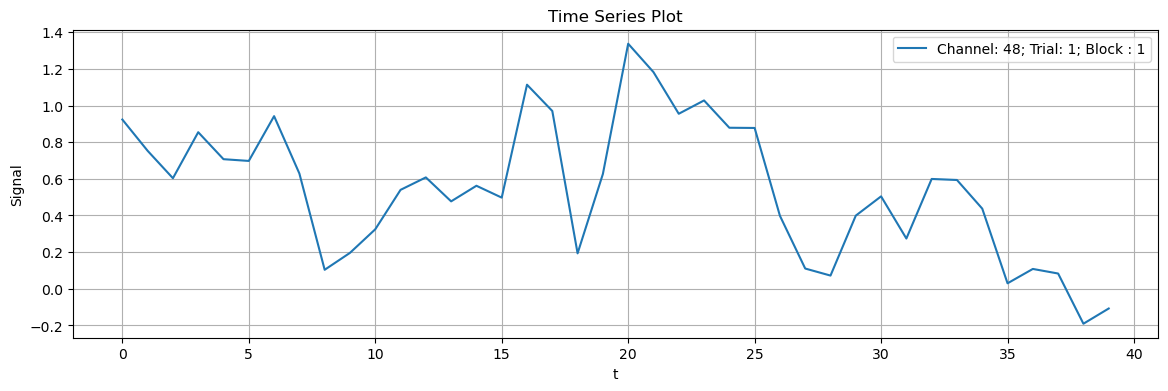

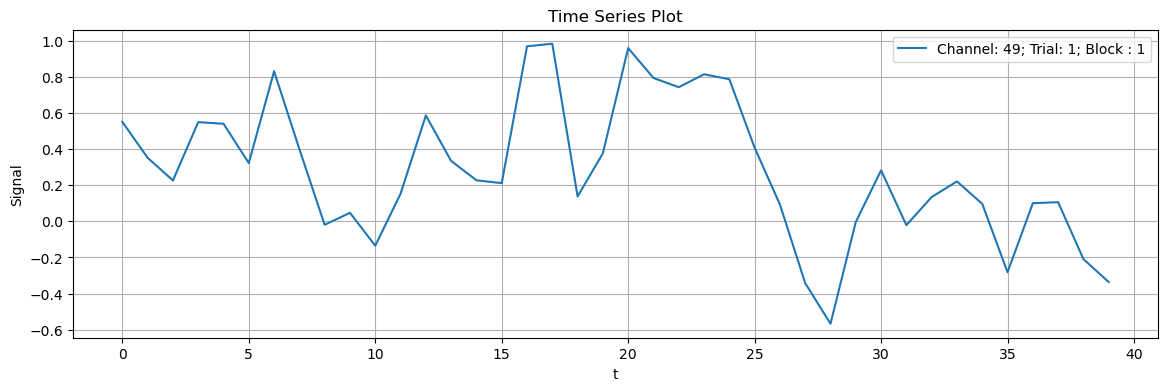

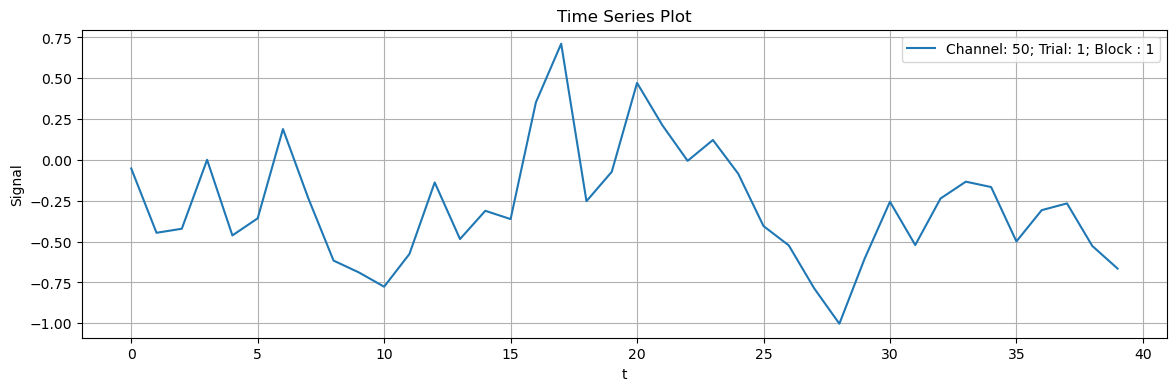

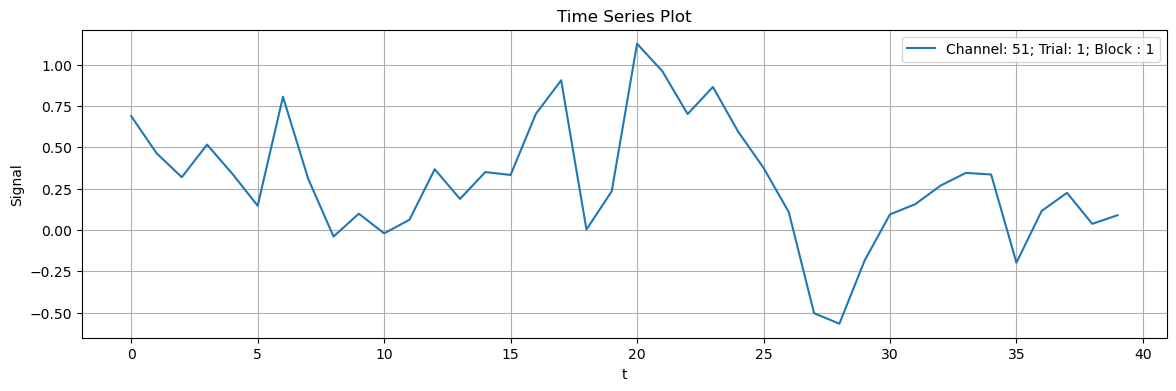

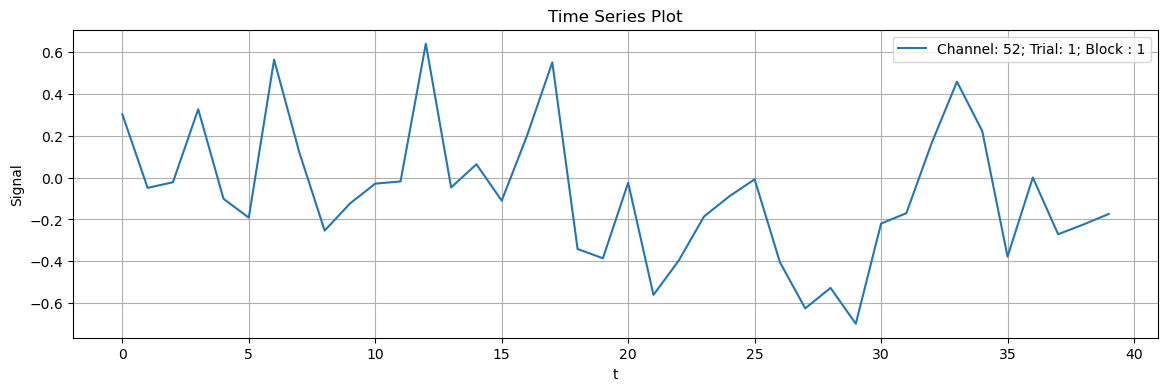

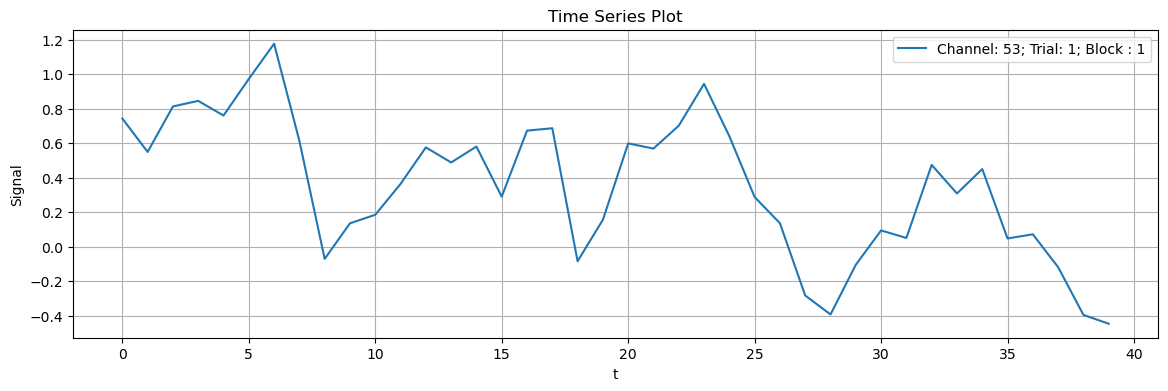

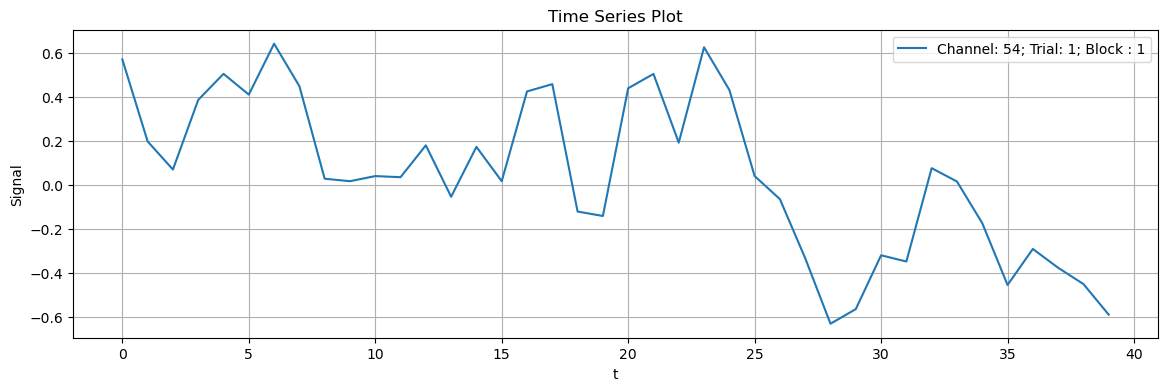

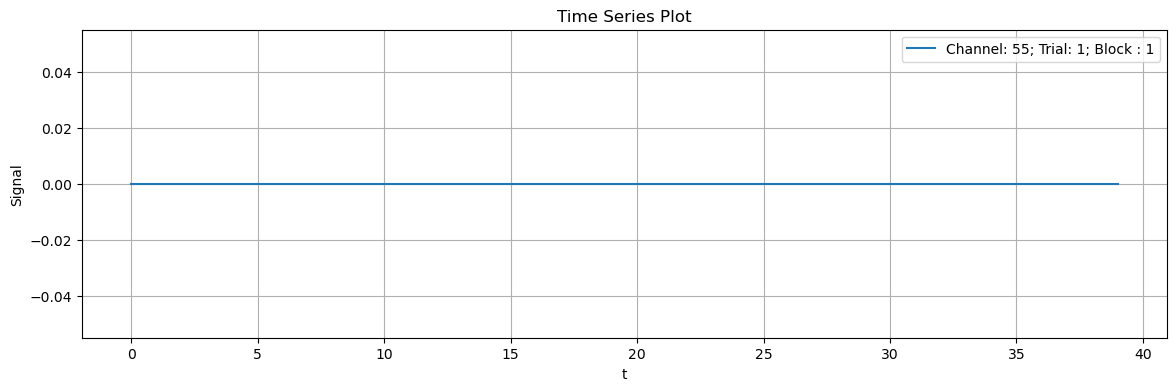

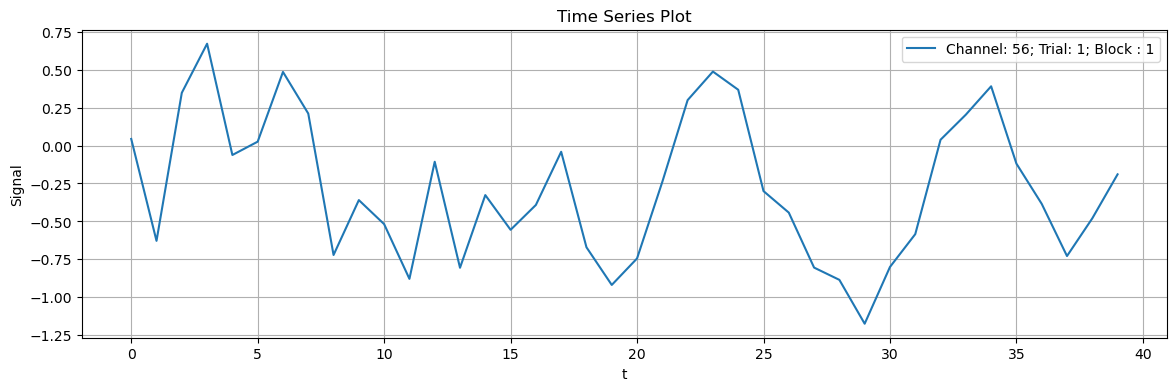

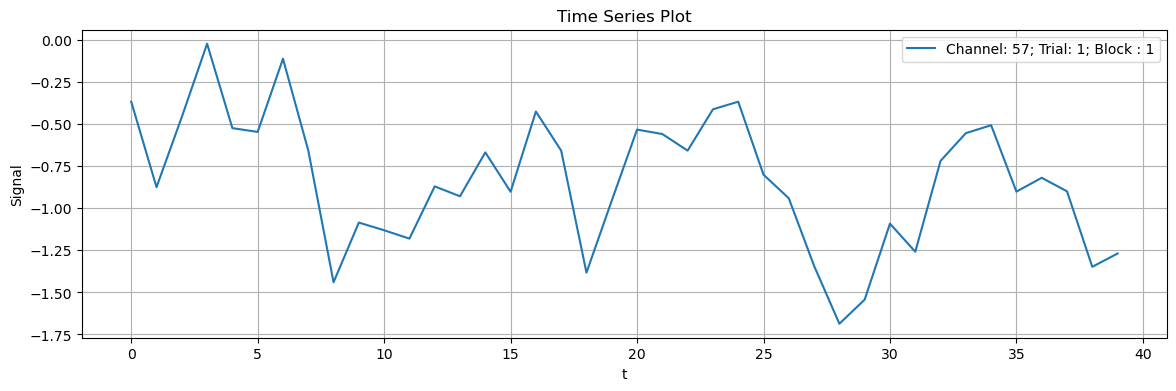

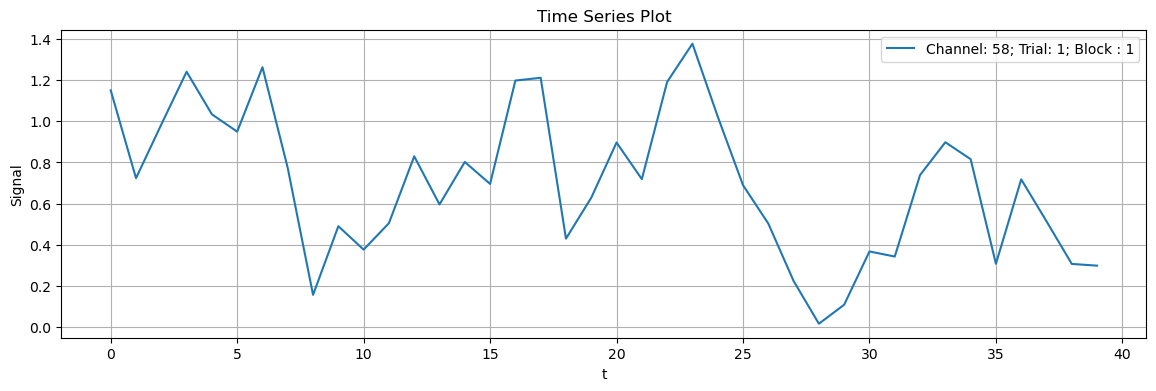

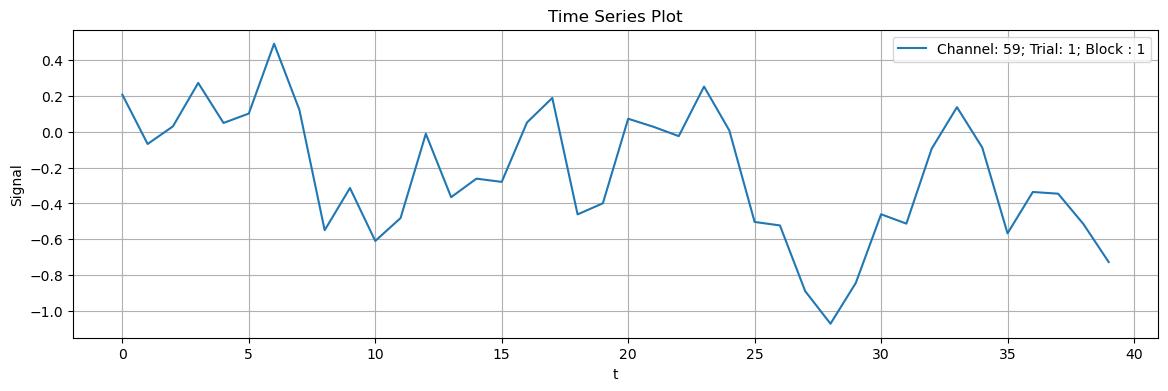

In [126]:
for c in range(60):
    plot_(data['dataSorted'], c,1,1,40)
    plt.show()

Columns: ['__header__', '__version__', '__globals__', 'dataAvgSorted', 'dataSorted',
          'dataSortedDS', 'ic_data2', 'ic_data3', 'indexM', 'listD', 'listM']

Channels (signal), time, trial, trialblock


ica source space

Motivacion: 

## Sumary of sumaries

In [119]:
def Check_Problematic(sub,block):
    return    (sub==1 and (block==4 or block ==9))or(
               sub==4 and (block==2 or block ==9)
              )or(sub==6 and (block==5 or block ==11))

Check_Problematic(1,4)    

True

In [8]:
subjects = range(25,36)
info = []
for p in subjects:
    data = loadmat(f'E:\data/dataClean-ICA3-{p}-T1.mat')
    info.append(summary(data['dataSorted']),False)

channel_activity = np.zeros((60,12,len(subjects)))
for i,dic in enumerate(info):
    for block in dic.keys():
        channel_activity[dic[block], int(block), i]=1

Channels: 60, Trials: 108, TrialBlocks: 12
Number of active channels for each trial block: [48. 52. 48. 48. 52. 52. 48. 52. 48. 52. 48. 52.]
Channels: 60, Trials: 108, TrialBlocks: 12
Number of active channels for each trial block: [56. 53. 53. 53.  0. 56. 56. 53. 56.  0. 53. 53.]
Channels: 60, Trials: 108, TrialBlocks: 12
Number of active channels for each trial block: [51. 56. 56. 56. 51. 51. 51. 56. 51. 51. 56. 56.]
Channels: 60, Trials: 108, TrialBlocks: 12
Number of active channels for each trial block: [57. 54. 57. 54. 57. 54. 57. 54. 54. 57. 54. 57.]
Channels: 60, Trials: 108, TrialBlocks: 12
Number of active channels for each trial block: [47. 47.  0. 47. 47. 47. 47. 47. 47.  0. 47. 47.]
Channels: 60, Trials: 108, TrialBlocks: 12
Number of active channels for each trial block: [56. 50. 50. 56. 50. 56. 56. 50. 56. 56. 50. 50.]
Channels: 60, Trials: 108, TrialBlocks: 12
Number of active channels for each trial block: [57. 48. 48. 57. 48.  0. 57. 48. 57. 48. 48.  0.]
Channels: 60,

In [106]:
missing_b = []
for val in info[0].keys():
    S = set([])
    for i in range(len(info)):
        if not(Check_Problematic(i,int(val))):
            S = S|set(info[i][val])
    missing_b.append(S)
missing_b

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  19,
  20,
  21,
  23,
  24,
  25,
  26,
  27,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  41,
  42,
  43,
  45,
  48,
  53,
  55,
  57},
 {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  16,
  19,
  20,
  21,
  23,
  24,
  26,
  28,
  29,
  30,
  31,
  34,
  38,
  40,
  41,
  42,
  48,
  49,
  51,
  53,
  55},
 {0,
  1,
  2,
  3,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  19,
  20,
  21,
  23,
  24,
  25,
  26,
  27,
  29,
  30,
  31,
  33,
  34,
  35,
  38,
  40,
  41,
  42,
  43,
  45,
  49,
  51,
  53,
  55},
 {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  19,
  20,
  21,
  23,
  24,
  25,
  26,
  29,
  30,
  31,
  32,
  34,
  35,
  40,
  41,
  45,
  48,
  49,
  51,
  53,
  55,
  57},
 {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,


In [120]:
missing = []
for i in range(len(info)):
    S = set([])
    for val in info[i].keys():
        if not(Check_Problematic(i,int(val))):
            S = S|set(info[i][val])
    missing.append(S)
missing 

[{7, 8, 9, 10, 12, 13, 15, 17, 19, 20, 21, 25, 26, 28, 29, 34, 45, 55},
 {2, 11, 14, 23, 30, 31, 40, 48, 49, 51, 55},
 {2, 10, 11, 20, 21, 29, 30, 31, 48, 55},
 {0, 2, 10, 20, 21, 42, 48},
 {0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 13, 16, 19, 25, 26, 35, 42},
 {2, 3, 8, 9, 10, 20, 29, 30, 31, 34, 38},
 {2, 7, 9, 10, 11, 12, 13, 17, 21, 26, 31, 34, 41, 42, 57},
 {0,
  1,
  2,
  3,
  4,
  5,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  19,
  20,
  21,
  23,
  29,
  30,
  31,
  32,
  41,
  42},
 {1, 5, 20, 21, 30, 53},
 {0, 6, 8, 9, 11, 14, 15, 17, 19, 20, 21, 24, 26, 27, 31, 33, 34},
 {0, 2, 3, 6, 11, 15, 16, 19, 23, 24, 26, 27, 35, 43}]

In [121]:
total = set([])    
for s in missing:
    total = total | s
60-len(total)

14

Some blocks are completely empyt:

Blocks 4 and 9 for subject 1

Blocks 2 and 9 for subject 4

Blocks 5 and 11 for subject 6

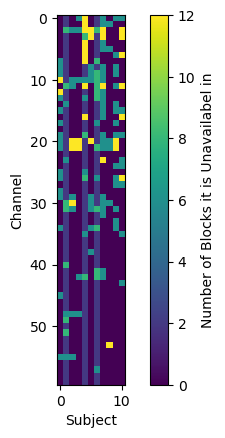

In [105]:
plt.imshow(np.sum(channel_activity, axis=1), cmap='viridis', interpolation='nearest')
plt.colorbar(label='Number of Blocks it is Unavailabel in') 
plt.xlabel('Subject')  # Label x-axis
plt.ylabel('Channel')  # Label y-axis
plt.title('')  # Add title
plt.show()

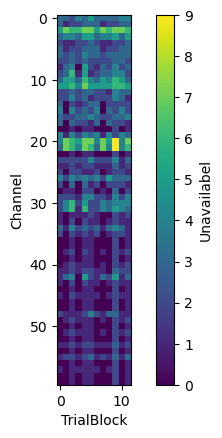

In [62]:
plt.imshow(np.sum(channel_activity, axis=2), cmap='viridis', interpolation='nearest')
plt.colorbar(label='Unavailabel') 
plt.xlabel('TrialBlock')  # Label x-axis
plt.ylabel('Channel')  # Label y-axis
plt.title('')  # Add title
plt.show()

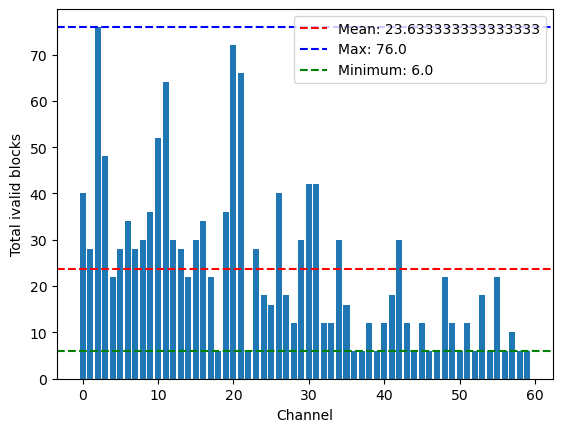

In [37]:
counts = np.sum(channel_activity, axis=(1,2))
plt.bar(range(0,60), counts)
plt.xlabel('Channel')
plt.ylabel('Total ivalid blocks')
plt.axhline(y=np.mean(counts), color='red', linestyle='--', label=f'Mean: {np.mean(counts)}')
plt.axhline(y=np.max(counts), color='blue', linestyle='--', label=f'Max: {np.max(counts)}')
plt.axhline(y=np.min(counts), color='green', linestyle='--', label=f'Minimum: {np.min(counts)}')
plt.legend()

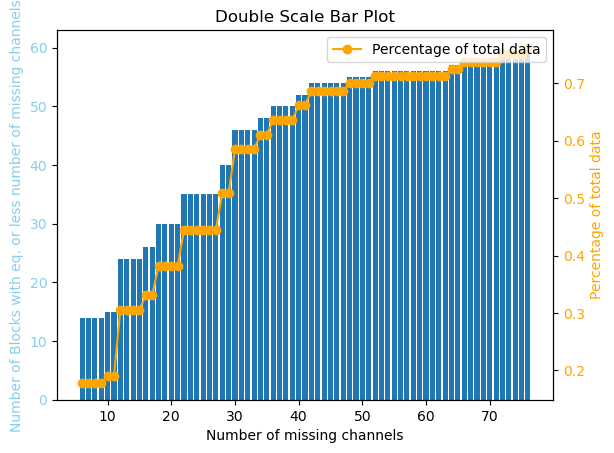

In [44]:
fig, ax1 = plt.subplots()

# Plot the first set of data (counts)
ax1.bar(range(6,77), np.array(blockm_chanels))

# Add labels and title for the first y-axis
ax1.set_xlabel('Number of missing channels')
ax1.set_ylabel('Number of Blocks with eq. or less number of missing channels', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis (right y-axis)
ax2 = ax1.twinx()

# Plot the second set of data (cumulative sum)
ax2.plot(range(6,77), np.array(blockm_chanels)/(60*131)*100 , color='orange', marker='o', label='Percentage of total data')

# Add labels and title for the second y-axis
ax2.set_ylabel('Percentage of total data', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legend
ax2.legend(loc='upper right')

# Show plot
plt.title('Double Scale Bar Plot')
plt.show()

### Scraps Of Code

In [3]:
data['ic_data3'].shape

(42, 1200, 108, 12)

In [9]:
data['dataSorted'].shape

(60, 1200, 108, 12)

In [11]:
data['dataSortedDS'].shape

(60, 240, 108, 12)

In [6]:
labels = [0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2]
labels = np.repeat(labels, 108) #(108/12=9) is both periodical within samples and trialblocks  
labels.shape

(1296,)

## Data preparation

In [3]:
def get_channels(data):
    #Dictionary of unavailable channes in each trial block
    channel_info = summary(data['dataSorted'], text=False) 
    
    #Identify unique sets of missing channels
    array_tuples = [tuple(array) for array in channel_info.values()]
    unique_tuples = set(array_tuples)
    unique_arrays = [np.array(tuple_) for tuple_ in unique_tuples]
    
    #Select the set of missing chanels
    #In this case we follow least number of missing channels
    select = min(unique_arrays, key=len)
    active_channels = [x for x in range(60) if x not in select]
    
    # blocks is the blocks we will use
    blocks = [key for key, value in channel_info.items() if set(value) == set(select)]
    blocks = np.array(blocks, int)
    
    #Slicing the data
    return data['dataSorted'][active_channels][...,blocks], blocks

In [4]:
sample = get_channels(data)
sample.shape

(52, 1200, 108, 6)

# Load data from a subject

In [29]:
def get_data_subject(data, sub, , selection_critirium=None):
    
    def Check_Problematic(sub,block):
        if not(sub in range(0,11)):
            sub = sub - 25
        return    (sub==1 and (block==4 or block ==9))or(
                   sub==4 and (block==2 or block ==9)
                  )or(sub==6 and (block==5 or block ==11))
    
    channel_info = summary(data['dataSorted'], text=False) 
    array_tuples = [tuple(array) for array in channel_info.values()]
    unique_tuples = set(array_tuples)
    unique_arrays = [np.array(tuple_) for tuple_ in unique_tuples]
    
    if selection_critirium==None:
        #Select the set of missing chanels
        #In this case we take all blocks unless, probelamtis need to be seen separetly
        seto = set()
        for arr in unique_arrays:
            seto = seto | set(arr)
        select = np.array(list(seto))
        blocks = np.array(range(12))
    else: 
        #In this case we follow least number of missing channels
        select = min(unique_arrays, key=len)
        # blocks is the blocks we will use
        blocks = [key for key, value in channel_info.items() if set(value) == set(select)]
        blocks = np.array(blocks, int)
        
    active_channels = [x for x in range(60) if x not in select]
    #if Check_Problematic(sub,block)
    
    return data['dataSorted'][active_channels][...,blocks], blocks

In [15]:
sha = sample.shape
ica3 = np.reshape(data['ic_data3'], (sha[-1]*sha[2],sha[0],sha[1]))


NameError: name 'sample' is not defined

In [30]:
get_data_subject(data, 0)

(array([[[[ 3.97246837e-02,  1.33054936e+00, -1.78196674e+00, ...,
            1.13482123e-02, -3.44882960e+00, -3.36318642e+00],
          [-1.44541109e+00,  3.67965581e+00,  1.08095560e-01, ...,
            1.10686017e+00, -1.86309804e+00, -8.39725602e-01],
          [ 5.92681373e-01, -7.85646077e-01,  9.26729927e-01, ...,
           -1.46838145e-01,  1.00274214e-01, -6.01769632e-01],
          ...,
          [ 6.80334061e-01, -6.75693757e-01,  6.90938983e-01, ...,
           -6.89103572e-01, -8.32226834e-01, -1.11389062e+00],
          [-1.16356995e+00,  1.83168362e+00, -4.76656384e-02, ...,
           -1.28171439e+00,  1.27922420e+00,  4.26411495e+00],
          [ 7.87890479e-02,  3.11361651e-01, -3.92440524e-01, ...,
           -1.03509562e+00,  9.91016442e-02, -3.37774649e-01]],
 
         [[-8.14034558e-01,  1.13155976e+00, -2.04147152e-02, ...,
            2.95246521e-01, -2.41899523e+00, -3.35347341e+00],
          [-1.29938046e+00,  3.51355321e+00, -1.32024887e-01, ...,
     

array([ 7,  8,  9, 10, 12, 13, 15, 17, 19, 20, 21, 25, 26, 28, 29, 34, 45,
       55])

In [ ]:
#Dictionary of unavailable channes in each trial block
channel_info = summary(data['dataSorted'], text=False) 

#Identify unique sets of missing channels
array_tuples = [tuple(array) for array in channel_info.values()]
unique_tuples = set(array_tuples)
unique_arrays = [np.array(tuple_) for tuple_ in unique_tuples]


active_channels = [x for x in range(60) if x not in select]

# blocks is the blocks we will use
blocks = [key for key, value in channel_info.items() if set(value) == set(select)]
blocks = np.array(blocks, int)

#Slicing the data
#return data['dataSorted'][active_channels][...,blocks], blocks